# Script para reproducir las gráficas del artículo "Conditions for the cosmological viability of $f(R)$ dark energy models", que se encuentra en https://arxiv.org/pdf/gr-qc/0612180.pdf

## Elementos necesarios :

* Integrador: Función que permite ejecutar Runge Kutta de orden 4 para un sistema de cuatro ecuaciones diferenciales con cuatro variables.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import random


# Ecuaciones diferenciales que deseamos resolver

# Funcion que hace uso de Runge Kutta para encontrar solucion de sistema de ecauciones diferenciales. Sus entradas con el valor de N minimo, el N maximo, el numero de puntos que tendra cada curva de solucion y las condiciones iniciales para x = x_1 , y = y_1, z = x_3 y w = x_4.

def solucion(N_min,N_max,n_puntos,x_0,y_0,z_0,w_0,x_prima,y_prima,z_prima,w_prima):

    h = (N_max - N_min)/n_puntos

    N = np.zeros(n_puntos)
    x = np.zeros(n_puntos) 
    y = np.zeros(n_puntos)
    z = np.zeros(n_puntos)
    w = np.zeros(n_puntos)
    
    #Condiciones iniciales
    x[0] = x_0
    y[0] = y_0
    z[0] = z_0
    w[0] = w_0
    N[0] = N_min
    # Inicia Runge Kutta Orden 4
    for i in range(1,n_puntos):
        k1_x = h * x_prima(x[i-1],y[i-1],z[i-1],w[i-1]) #Euler
        k1_y = h * y_prima(x[i-1],y[i-1],z[i-1],w[i-1])
        k1_z = h * z_prima(x[i-1],y[i-1],z[i-1],w[i-1])
        k1_w = h * w_prima(x[i-1],y[i-1],z[i-1],w[i-1])

        k2_x = h * x_prima(x[i-1] + 0.5*k1_x, y[i-1] + 0.5*k1_y, z[i-1]+ 0.5*k1_z,w[i-1] + 0.5*k1_w ) 
        k2_y = h * y_prima(x[i-1] + 0.5*k1_x, y[i-1] + 0.5*k1_y, z[i-1]+ 0.5*k1_z,w[i-1] + 0.5*k1_w )
        k2_z = h * z_prima(x[i-1] + 0.5*k1_x, y[i-1] + 0.5*k1_y, z[i-1]+ 0.5*k1_z,w[i-1] + 0.5*k1_w )
        k2_w = h * w_prima(x[i-1] + 0.5*k1_x, y[i-1] + 0.5*k1_y, z[i-1]+ 0.5*k1_z,w[i-1] + 0.5*k1_w )

        k3_x = h * x_prima(x[i-1] + 0.5*k2_x, y[i-1] + 0.5*k2_y, z[i-1]+ 0.5*k2_z,w[i-1] + 0.5*k2_w )
        k3_y = h * y_prima(x[i-1] + 0.5*k2_x, y[i-1] + 0.5*k2_y, z[i-1]+ 0.5*k2_z,w[i-1] + 0.5*k2_w )
        k3_z = h * z_prima(x[i-1] + 0.5*k2_x, y[i-1] + 0.5*k2_y, z[i-1]+ 0.5*k2_z,w[i-1] + 0.5*k2_w )
        k3_w = h * w_prima(x[i-1] + 0.5*k2_x, y[i-1] + 0.5*k2_y, z[i-1]+ 0.5*k2_z,w[i-1] + 0.5*k2_w )


        k4_x = h * x_prima(x[i-1] + k3_x, y[i-1] + k3_y, z[i-1] + k3_z, w[i-1] + k3_w ) 
        k4_y = h * y_prima(x[i-1] + k3_x, y[i-1] + k3_y, z[i-1] + k3_z, w[i-1] + k3_w )
        k4_z = h * z_prima(x[i-1] + k3_x, y[i-1] + k3_y, z[i-1] + k3_z, w[i-1] + k3_w )
        k4_w = h * w_prima(x[i-1] + k3_x, y[i-1] + k3_y, z[i-1] + k3_z, w[i-1] + k3_w )
    
    #Promedio ponderado de pendientes
        average_k_x = (1.0/6.0)*(k1_x + 2.0*k2_x + 2.0*k3_x + k4_x)
        average_k_y = (1.0/6.0)*(k1_y + 2.0*k2_y + 2.0*k3_y + k4_y)
        average_k_z = (1.0/6.0)*(k1_z + 2.0*k2_z + 2.0*k3_z + k4_z)
        average_k_w = (1.0/6.0)*(k1_w + 2.0*k2_w + 2.0*k3_w + k4_w)
    # Evolucion en el tiempo
        N[i] = N[i-1] + h
        x[i] = x[i-1] + average_k_x
        y[i] = y[i-1] + average_k_y 
        z[i] = z[i-1] + average_k_z 
        w[i] = w[i-1] + average_k_w 

    # Termina Runge Kutta Orden 4
    return N,x,y,z,w

* Integrador backward: Permite resolver un sistema de ecuaciones diferenciales a partir de su valor final

In [2]:
def solucion_backward(N_min,N_max,n_puntos,x_f,y_f,z_f,w_f,x_prima,y_prima,z_prima,w_prima):

    h = (N_max - N_min)/n_puntos

    N = np.zeros(n_puntos)
    x = np.zeros(n_puntos) 
    y = np.zeros(n_puntos)
    z = np.zeros(n_puntos)
    w = np.zeros(n_puntos)

    #Condiciones iniciales
    x[n_puntos-1] = x_f
    y[n_puntos-1] = y_f
    z[n_puntos-1] = z_f
    w[n_puntos-1] = w_f
    N[n_puntos-1] = N_max
    # Inicia Runge Kutta Orden 4
    for i in range(1,n_puntos):
        i = (n_puntos-1)-i

        k1_x = h * x_prima(x[i+1],y[i+1],z[i+1],w[i+1]) #Euler
        k1_y = h * y_prima(x[i+1],y[i+1],z[i+1],w[i+1])
        k1_z = h * z_prima(x[i+1],y[i+1],z[i+1],w[i+1])
        k1_w = h * w_prima(x[i+1],y[i+1],z[i+1],w[i+1])

        k2_x = h * x_prima(x[i+1] - 0.5*k1_x, y[i+1] - 0.5*k1_y, z[i+1] - 0.5*k1_z, w[i+1] - 0.5*k1_w) 
        k2_y = h * y_prima(x[i+1] - 0.5*k1_x, y[i+1] - 0.5*k1_y, z[i+1] - 0.5*k1_z, w[i+1] - 0.5*k1_w)
        k2_z = h * z_prima(x[i+1] - 0.5*k1_x, y[i+1] - 0.5*k1_y, z[i+1] - 0.5*k1_z, w[i+1] - 0.5*k1_w)
        k2_w = h * w_prima(x[i+1] - 0.5*k1_x, y[i+1] - 0.5*k1_y, z[i+1] - 0.5*k1_z, w[i+1] - 0.5*k1_w)
        

        k3_x = h * x_prima(x[i+1] - 0.5*k2_x, y[i+1] - 0.5*k2_y, z[i+1] - 0.5*k2_z, w[i+1] - 0.5*k2_w)
        k3_y = h * y_prima(x[i+1] - 0.5*k2_x, y[i+1] - 0.5*k2_y, z[i+1] - 0.5*k2_z, w[i+1] - 0.5*k2_w)
        k3_z = h * z_prima(x[i+1] - 0.5*k2_x, y[i+1] - 0.5*k2_y, z[i+1] - 0.5*k2_z, w[i+1] - 0.5*k2_w)
        k3_w = h * w_prima(x[i+1] - 0.5*k2_x, y[i+1] - 0.5*k2_y, z[i+1] - 0.5*k2_z, w[i+1] - 0.5*k2_w)

        k4_x = h * x_prima(x[i+1] - k3_x, y[i+1] - k3_y, z[i+1] - k3_z, w[i+1] - k3_w) 
        k4_y = h * y_prima(x[i+1] - k3_x, y[i+1] - k3_y, z[i+1] - k3_z, w[i+1] - k3_w)
        k4_z = h * y_prima(x[i+1] - k3_x, y[i+1] - k3_y, z[i+1] - k3_z, w[i+1] - k3_w)
        k4_w = h * y_prima(x[i+1] - k3_x, y[i+1] - k3_y, z[i+1] - k3_z, w[i+1] - k3_w)
        
    
    #Promedio ponderado de pendientes
        average_k_x = (1.0/6.0)*(k1_x + 2.0*k2_x + 2.0*k3_x + k4_x)
        average_k_y = (1.0/6.0)*(k1_y + 2.0*k2_y + 2.0*k3_y + k4_y)
        average_k_z = (1.0/6.0)*(k1_z + 2.0*k2_z + 2.0*k3_z + k4_z)
        average_k_w = (1.0/6.0)*(k1_w + 2.0*k2_w + 2.0*k3_w + k4_w)

    # Evolucion en el tiempo
        N[i] = N[i+1] - h
        x[i] = x[i+1] - average_k_x
        y[i] = y[i+1] - average_k_y
        z[i] = z[i+1] - average_k_z 
        w[i] = w[i+1] - average_k_w
         

    # Termina Runge Kutta Orden 4
    return N,x,y,z,w

* Integrador con $x_4=0$

In [3]:
def solucion_sin_radiacion(N_min,N_max,n_puntos,x_0,y_0,z_0,w_0,x_prima,y_prima,z_prima,w_prima):

    h = (N_max - N_min)/n_puntos

    N = np.zeros(n_puntos)
    x = np.zeros(n_puntos) 
    y = np.zeros(n_puntos)
    z = np.zeros(n_puntos)
    w = np.zeros(n_puntos)
    
    #Condiciones iniciales
    x[0] = x_0
    y[0] = y_0
    z[0] = z_0
    w[0] = w_0
    N[0] = N_min
    # Inicia Runge Kutta Orden 4
    for i in range(1,n_puntos):
        k1_x = h * x_prima(x[i-1],y[i-1],z[i-1],w[i-1]) #Euler
        k1_y = h * y_prima(x[i-1],y[i-1],z[i-1],w[i-1])
        k1_z = h * z_prima(x[i-1],y[i-1],z[i-1],w[i-1])
        k1_w = h * w_prima(x[i-1],y[i-1],z[i-1],w[i-1])

        k2_x = h * x_prima(x[i-1] + 0.5*k1_x, y[i-1] + 0.5*k1_y, z[i-1]+ 0.5*k1_z,w[i-1] + 0.5*k1_w ) 
        k2_y = h * y_prima(x[i-1] + 0.5*k1_x, y[i-1] + 0.5*k1_y, z[i-1]+ 0.5*k1_z,w[i-1] + 0.5*k1_w )
        k2_z = h * z_prima(x[i-1] + 0.5*k1_x, y[i-1] + 0.5*k1_y, z[i-1]+ 0.5*k1_z,w[i-1] + 0.5*k1_w )
        k2_w = h * w_prima(x[i-1] + 0.5*k1_x, y[i-1] + 0.5*k1_y, z[i-1]+ 0.5*k1_z,w[i-1] + 0.5*k1_w )

        k3_x = h * x_prima(x[i-1] + 0.5*k2_x, y[i-1] + 0.5*k2_y, z[i-1]+ 0.5*k2_z,w[i-1] + 0.5*k2_w )
        k3_y = h * y_prima(x[i-1] + 0.5*k2_x, y[i-1] + 0.5*k2_y, z[i-1]+ 0.5*k2_z,w[i-1] + 0.5*k2_w )
        k3_z = h * z_prima(x[i-1] + 0.5*k2_x, y[i-1] + 0.5*k2_y, z[i-1]+ 0.5*k2_z,w[i-1] + 0.5*k2_w )
        k3_w = h * w_prima(x[i-1] + 0.5*k2_x, y[i-1] + 0.5*k2_y, z[i-1]+ 0.5*k2_z,w[i-1] + 0.5*k2_w )


        k4_x = h * x_prima(x[i-1] + k3_x, y[i-1] + k3_y, z[i-1] + k3_z, w[i-1] + k3_w ) 
        k4_y = h * y_prima(x[i-1] + k3_x, y[i-1] + k3_y, z[i-1] + k3_z, w[i-1] + k3_w )
        k4_z = h * z_prima(x[i-1] + k3_x, y[i-1] + k3_y, z[i-1] + k3_z, w[i-1] + k3_w )
        k4_w = h * w_prima(x[i-1] + k3_x, y[i-1] + k3_y, z[i-1] + k3_z, w[i-1] + k3_w )
    
    #Promedio ponderado de pendientes
        average_k_x = (1.0/6.0)*(k1_x + 2.0*k2_x + 2.0*k3_x + k4_x)
        average_k_y = (1.0/6.0)*(k1_y + 2.0*k2_y + 2.0*k3_y + k4_y)
        average_k_z = (1.0/6.0)*(k1_z + 2.0*k2_z + 2.0*k3_z + k4_z)
        average_k_w = (1.0/6.0)*(k1_w + 2.0*k2_w + 2.0*k3_w + k4_w)
    # Evolucion en el tiempo
        N[i] = N[i-1] + h
        x[i] = x[i-1] + average_k_x
        y[i] = y[i-1] + average_k_y 
        z[i] = z[i-1] + average_k_z 
        w[i] = 0.0

    # Termina Runge Kutta Orden 4
    return N,x,y,z,w

* Integrador backwards con $x_4=0$

In [4]:
def solucion_backward_sin_radiacion(N_min,N_max,n_puntos,x_f,y_f,z_f,w_f,x_prima,y_prima,z_prima,w_prima):

    h = (N_max - N_min)/n_puntos

    N = np.zeros(n_puntos)
    x = np.zeros(n_puntos) 
    y = np.zeros(n_puntos)
    z = np.zeros(n_puntos)
    w = np.zeros(n_puntos)

    #Condiciones iniciales
    x[n_puntos-1] = x_f
    y[n_puntos-1] = y_f
    z[n_puntos-1] = z_f
    w[n_puntos-1] = w_f
    N[n_puntos-1] = N_max
    # Inicia Runge Kutta Orden 4
    for i in range(1,n_puntos):
        i = (n_puntos-1)-i

        k1_x = h * x_prima(x[i+1],y[i+1],z[i+1],w[i+1]) #Euler
        k1_y = h * y_prima(x[i+1],y[i+1],z[i+1],w[i+1])
        k1_z = h * z_prima(x[i+1],y[i+1],z[i+1],w[i+1])
        k1_w = h * w_prima(x[i+1],y[i+1],z[i+1],w[i+1])

        k2_x = h * x_prima(x[i+1] - 0.5*k1_x, y[i+1] - 0.5*k1_y, z[i+1] - 0.5*k1_z, w[i+1] - 0.5*k1_w) 
        k2_y = h * y_prima(x[i+1] - 0.5*k1_x, y[i+1] - 0.5*k1_y, z[i+1] - 0.5*k1_z, w[i+1] - 0.5*k1_w)
        k2_z = h * z_prima(x[i+1] - 0.5*k1_x, y[i+1] - 0.5*k1_y, z[i+1] - 0.5*k1_z, w[i+1] - 0.5*k1_w)
        k2_w = h * w_prima(x[i+1] - 0.5*k1_x, y[i+1] - 0.5*k1_y, z[i+1] - 0.5*k1_z, w[i+1] - 0.5*k1_w)
        

        k3_x = h * x_prima(x[i+1] - 0.5*k2_x, y[i+1] - 0.5*k2_y, z[i+1] - 0.5*k2_z, w[i+1] - 0.5*k2_w)
        k3_y = h * y_prima(x[i+1] - 0.5*k2_x, y[i+1] - 0.5*k2_y, z[i+1] - 0.5*k2_z, w[i+1] - 0.5*k2_w)
        k3_z = h * z_prima(x[i+1] - 0.5*k2_x, y[i+1] - 0.5*k2_y, z[i+1] - 0.5*k2_z, w[i+1] - 0.5*k2_w)
        k3_w = h * w_prima(x[i+1] - 0.5*k2_x, y[i+1] - 0.5*k2_y, z[i+1] - 0.5*k2_z, w[i+1] - 0.5*k2_w)

        k4_x = h * x_prima(x[i+1] - k3_x, y[i+1] - k3_y, z[i+1] - k3_z, w[i+1] - k3_w) 
        k4_y = h * y_prima(x[i+1] - k3_x, y[i+1] - k3_y, z[i+1] - k3_z, w[i+1] - k3_w)
        k4_z = h * y_prima(x[i+1] - k3_x, y[i+1] - k3_y, z[i+1] - k3_z, w[i+1] - k3_w)
        k4_w = h * y_prima(x[i+1] - k3_x, y[i+1] - k3_y, z[i+1] - k3_z, w[i+1] - k3_w)
        
    
    #Promedio ponderado de pendientes
        average_k_x = (1.0/6.0)*(k1_x + 2.0*k2_x + 2.0*k3_x + k4_x)
        average_k_y = (1.0/6.0)*(k1_y + 2.0*k2_y + 2.0*k3_y + k4_y)
        average_k_z = (1.0/6.0)*(k1_z + 2.0*k2_z + 2.0*k3_z + k4_z)
        average_k_w = (1.0/6.0)*(k1_w + 2.0*k2_w + 2.0*k3_w + k4_w)

    # Evolucion en el tiempo
        N[i] = N[i+1] - h
        x[i] = x[i+1] - average_k_x
        y[i] = y[i+1] - average_k_y
        z[i] = z[i+1] - average_k_z 
        w[i] = 0.0
         

    # Termina Runge Kutta Orden 4
    return N,x,y,z,w

* Función que permite tener plantilla para gráficas de la Figura 3

In [5]:
def plantilla_Figura3(s_x, s_y):
    triangulo_1 = plt.Polygon([[-2+s_x, 1+s_y], [-2.5+s_x, 1+s_y], [-2.5+s_x, 1.5+s_y]],fill=True, color="#808080")
    plt.gca().add_patch(triangulo_1)
    triangulo_2 = plt.Polygon([[-3+s_x, 2+s_y], [-2.5+s_x, 2+s_y], [-2.5+s_x, 1.5+s_y]],fill=True, color="#808080")
    plt.gca().add_patch(triangulo_2)
    triangulo_3 = plt.Polygon([[-1.5, 0.5], [-1, 0.5], [-1, 0]],fill=True, color="#b3b3b3")
    plt.gca().add_patch(triangulo_3)
    triangulo_4 = plt.Polygon([[-1, 0], [-1, -0.5], [-0.5, -0.5]],fill=True, color="#b3b3b3")
    plt.gca().add_patch(triangulo_4)
    triangulo_5 = plt.Polygon([[0.5, -1.5], [1, -1.5], [1, -2]],fill=True, color="#808080")
    plt.gca().add_patch(triangulo_5)
    triangulo_6 = plt.Polygon([[1, -2], [1, -2.5], [1.5, -2.5]],fill=True, color="#808080")
    plt.gca().add_patch(triangulo_6)
    linea_vertical_punteada_negra = plt.Polygon([[-2, 1], [-2, 0]], closed=None, fill=None, edgecolor='#000000',linestyle="--")
    plt.gca().add_patch(linea_vertical_punteada_negra)
    linea_horizontal_negra = plt.Polygon([[-3, 0], [3, 0]], closed=None, fill=None, edgecolor='#000000',linestyle="-")
    plt.gca().add_patch(linea_horizontal_negra)
    linea_critica_1 = plt.Polygon([[-3, 2], [-2, 1]], closed=None, fill=None, edgecolor='#000000',linestyle="-", linewidth=3.0)
    plt.gca().add_patch(linea_critica_1)
    linea_critica_2 = plt.Polygon([[-2, 1], [-1, 0]], closed=None, fill=None, edgecolor='#000000',linestyle="--")
    plt.gca().add_patch(linea_critica_2)
    linea_critica_3 = plt.Polygon([[-1, 0], [-0.5, -0.5]], closed=None, fill=None, edgecolor='#000000',linestyle="-", linewidth=3.0)
    plt.gca().add_patch(linea_critica_3)
    linea_critica_4 = plt.Polygon([[-0.5, -0.5], [0.5, -1.5]], closed=None, fill=None, edgecolor='#000000',linestyle="--")
    plt.gca().add_patch(linea_critica_4)
    linea_critica_5 = plt.Polygon([[0.5, -1.5], [2.5, -3.5]], closed=None, fill=None, edgecolor='#000000',linestyle="-", linewidth=3.0)
    plt.gca().add_patch(linea_critica_5)
    plt.text(-3,1.1,r'$C$',fontsize=15)
    plt.text(-2.5,0.5,r'$P_1$',fontsize=15)
    plt.text(-1,-1.1,r'$B$',fontsize=15)
    plt.text(2.3,-3,r'$A$',fontsize=15)
    plt.xlim(xmin= -3.1, xmax=3.1)
    plt.ylim(ymin=-3.5,ymax=2.5)
    plt.xlabel(r"$r$")
    plt.ylabel(r"$m$")

* Generador de números aleatorios

In [6]:
def generar_aleatorios(radio):
    x_1 = 2*random.random() -1 # numero aleatorio entre -1 y 1
    x_2 = 2*random.random() -1 # numero aleatorio entre -1 y 1
    x_3 = 2*random.random() -1 # numero aleatorio entre -1 y 1

    x_1p = x_1/(1 + np.sqrt(x_1**2 + x_2**2 + x_3**2))
    x_2p = x_2/(1 + np.sqrt(x_1**2 + x_2**2 + x_3**2))

    if (x_1p**2 + x_2p**2 <= radio**2):
        return x_1,x_2,x_3

    else:
        generar_aleatorios(radio)

* Constantes

In [7]:
Omega_m_0 = 0.3
Omega_rad_0 = 1E-4
Omega_DE_0 = 1.0-Omega_m_0-Omega_rad_0

## Figura 1:

Para esta gráfica basta con tener las consideraciones dadas para el punto $P_6$ en las páginas 8 y 9 del artículo y usar la Ecuación (39):

\begin{align*}
    w_{eff} = \frac{2-5m - 6m^2}{3m(1+2m)}
\end{align*}

La sección (A) cubre el dominio $m<-(1+\sqrt{3})/2$. La sección (B) cubre el dominio $-1/2<m<0$. La sección (C) cubre el dominio $m\geq 1$ y la sección (D) cubre el dominio $(\sqrt{3}-1)/2<m<1$. Se tomarán para la gráfica valores de $m$ tales que $-3<m<3$ y se pondrá un valor límite para los valores de $w_{eff}$ que aparecerán en la gráfica, que serán tales que $-9<w_{eff}<0$

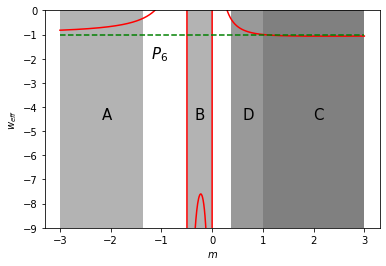

In [8]:
m = np.linspace(-3,3,1000) # Array con 1000 elementos entre -3 y 3
w_eff = (2 - 5*m - 6*m**2)/(3*m*(1 + 2*m))
w_eff_vertical = -1*np.ones(np.size(m))

rectangulo_A = plt.Rectangle((-3,-9), 1.6340, 9, fc="#b3b3b3")
plt.gca().add_patch(rectangulo_A)
plt.text(-2.183,-4.5,'A',fontsize=15)
rectangulo_B = plt.Rectangle((-0.5,-9), 0.5, 9, fc="#b3b3b3")
plt.gca().add_patch(rectangulo_B)
plt.text(-0.35,-4.5,'B',fontsize=15)
rectangulo_D = plt.Rectangle((0.3660,-9), 0.6339, 9, fc="#999999")
plt.gca().add_patch(rectangulo_D)
plt.text(2,-4.5,'C',fontsize=15)
rectangulo_C = plt.Rectangle((1,-9), 2, 9, fc="#808080")
plt.gca().add_patch(rectangulo_C)
plt.text(0.6,-4.5,'D',fontsize=15)
plt.text(-1.2,-2,r'$P_6$',fontsize=15)
plt.plot(m,w_eff,color="red")
plt.plot(m,w_eff_vertical,color="green", linestyle="dashed")
plt.xlabel(r"$m$")
plt.ylabel(r"$w_{eff}$")
plt.ylim(ymin=-9.0, ymax=0.0)
plt.show()

## Figura 3:

Se hacen 6 gráficas de m(r) vs r para distintos modelos. El primer modelo es $f(r) = R + \alpha/R$ y el segudno es $f(R) = R + \alpha R^3$. Las expresiones para $m(r)$ se obtienen de la Ecuación (60):

\begin{align*}
    m(r) = -\frac{n(1+r)}{r}.
\end{align*}

El tercer modelo es $f(R) = Re^{R}$. La expresión para $m(r)$ de este modelo se obtuvo de la Ecuación (64):

\begin{align*}
    m(r) = -r + \frac{p}{r}.
\end{align*}

El cuarto modelo es $f(R) = Re^{1/R}$. La expresión para $m(r)$ en este modelo se obtuvo de la Ecuación (67):

\begin{align*}
    m(r) = -\frac{p + r(2+r)}{r}
\end{align*}

El quinto y secto modelo son $f(R) = R\ln(R)$ y $f(R) = R^2 \ln(R)$ respectivamente. Las expresiones para $m(r)$ para estos modelos se obtuvieron de la Ecuación (66):

\begin{align*}
    m(r) = \frac{p^2 + 2pr - r(q-r-qr)}{qr}.
\end{align*}

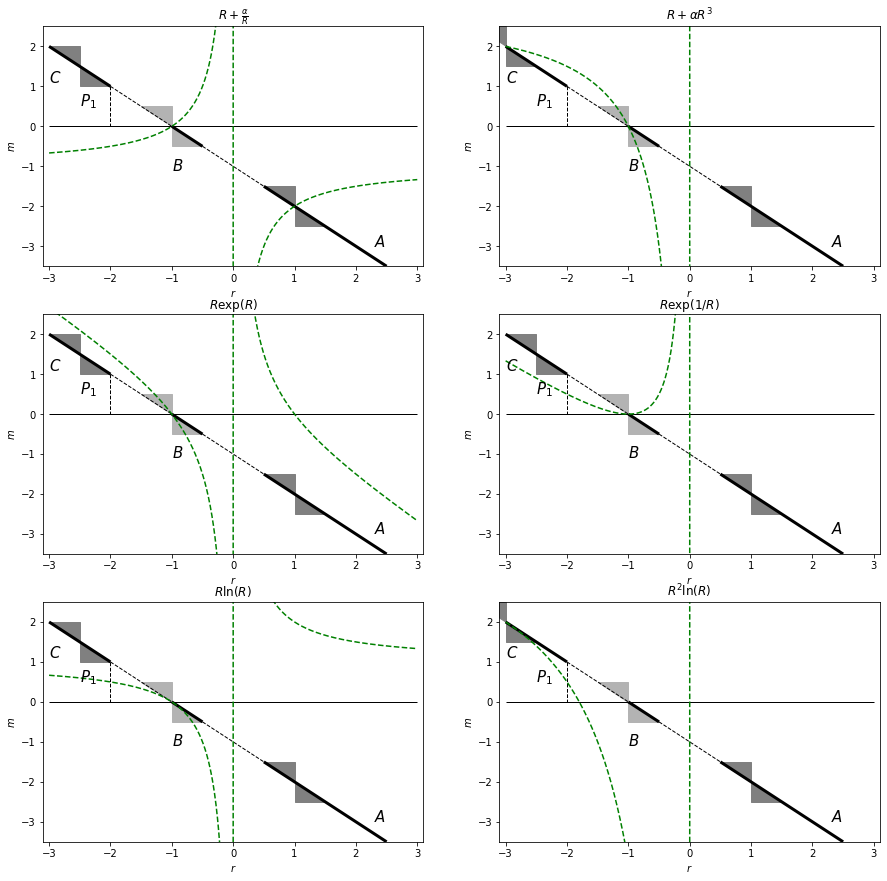

In [9]:
r = np.linspace(-3,3,1000) # Posibles valores de la variable r
m_1 = -(1+r)/r
m_2 = 3*(1+r)/r
m_3 = -r + (1/r)
m_4 = -(1 + r*(2+r))/r
m_5 = (1+r)/r
m_6 = (9+5*r)/r


figura = plt.figure(figsize=(15,15))
figura1= figura.add_subplot(321)
plantilla_Figura3(0,0)
figura1.plot(r,m_1, color="green", linestyle="dashed")
plt.title(r"$R + \frac{\alpha}{R}$")
figura2 = figura.add_subplot(322)
plantilla_Figura3(-0.5,0.5)
figura2.plot(r,m_2, color="green", linestyle="dashed")
plt.title(r"$R + \alpha R^3$")
figura3 = figura.add_subplot(323)
plantilla_Figura3(0,0)
figura3.plot(r,m_3, color="green", linestyle="dashed")
plt.title(r"$R\exp(R)$")
figura4 = figura.add_subplot(324)
plantilla_Figura3(0,0)
figura4.plot(r,m_4, color="green", linestyle="dashed")
plt.title(r"$R\exp(1/R)$")
figura5 = figura.add_subplot(325)
plantilla_Figura3(0,0)
figura5.plot(r,m_5, color="green", linestyle="dashed")
plt.title(r"$R\ln(R)$")
figura6 = figura.add_subplot(326)
plantilla_Figura3(-0.5,0.5)
figura6.plot(r,m_6, color="green", linestyle="dashed")
plt.title(r"$R^2\ln(R)$")


plt.show()

## Figura 4:

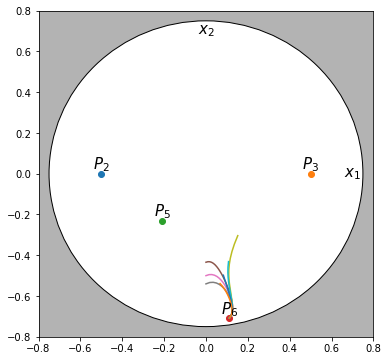

In [29]:
def x_prima_fig4(x,y,z,w):
    return x**2 - x*z - 3*y - z + w - 1.0


def y_prima_fig4(x,y,z,w):
    r = z/y
    m = 0.9-1
    return x*y + x*z/m - 2*y*(z-2.0)
   

def z_prima_fig4(x,y,z,w):
    r = z/y
    m = 0.9-1
    return -x*z/m - 2*z*(z-2.0)
    

def w_prima_fig4(x,y,z,w):
   return x*w - 2*z*w

plt.figure(figsize=(6,6))

fondo = plt.Rectangle((-0.8,-0.8), 1.6, 1.6, fc="#b3b3b3")
plt.gca().add_patch(fondo)

circulo = plt.Circle((0, 0), radius=0.75, fc="#ffffff", edgecolor="black")
plt.gca().add_patch(circulo)


p1 = [0,-1,2]
p1_p = [p1[0]/(1.0 + np.sqrt(p1[0]**2 + p1[1]**2 + p1[2]**2)),p1[1]/(1.0 + np.sqrt(p1[0]**2 + p1[1]**2 + p1[2]**2))]
p2 = [-1,0,0]
p2_p = [p2[0]/(1.0 + np.sqrt(p2[0]**2 + p2[1]**2 + p2[2]**2)),p2[1]/(1.0 + np.sqrt(p2[0]**2 + p2[1]**2 + p2[2]**2))]
p3 = [1,0,0]
p3_p = [p3[0]/(1.0 + np.sqrt(p3[0]**2 + p3[1]**2 + p3[2]**2)),p3[1]/(1.0 + np.sqrt(p3[0]**2 + p3[1]**2 + p3[2]**2))]
p4 = [0,-1,2]
p4_p = [p4[0]/(1.0 + np.sqrt(p4[0]**2 + p4[1]**2 + p4[2]**2)),p4[1]/(1.0 + np.sqrt(p4[0]**2 + p4[1]**2 + p4[2]**2))]
n = -0.9
m = -n-1
p5 = [(3*m)/(1+m),-(1+4*m)/(2*(1+m)**2),(1+4*m)/(2*(1+m))]
p5_p = [p5[0]/(1.0 + np.sqrt(p5[0]**2 + p5[1]**2 + p5[2]**2)),p5[1]/(1.0 + np.sqrt(p5[0]**2 + p5[1]**2 + p5[2]**2))]
p6 = [(2*(1-m))/(1+2*m),(1-4*m)/(m*(1+2*m)),-(1-4*m)*(1+m)/(m*(1+2*m))]
p6_p = [p6[0]/(1.0 + np.sqrt(p6[0]**2 + p6[1]**2 + p6[2]**2)),p6[1]/(1.0 + np.sqrt(p6[0]**2 + p6[1]**2 + p6[2]**2))]

plt.plot(p2_p[0],p2_p[1],marker="o")
plt.plot(p3_p[0],p3_p[1],marker="o")
plt.plot(p5_p[0],p5_p[1],marker="o")
plt.plot(p6_p[0],p6_p[1],marker="o")
plt.text(p2_p[0],p2_p[1],r'$P_2$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p3_p[0],p3_p[1],r'$P_3$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p5_p[0],p5_p[1],r'$P_5$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p6_p[0],p6_p[1],r'$P_6$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')

plt.text(0.70,0,r'$x_1$',fontsize=15, horizontalalignment='center',verticalalignment='center')
plt.text(0,0.70,r'$x_2$',fontsize=15, horizontalalignment='center',verticalalignment='center')


# Condiciones iniciales que debe poner
iniciales = np.array([[0,-1,2],[0,-2,3],[0,-3,4],[0,-4,5],[0.5,-1,2],[0.5,-2,3],[0.5,-3,4],[0.5,-4,5]])


for i in range(len(iniciales)):
    
    x_0,y_0,z_0 = iniciales[i,0], iniciales[i,1], iniciales[i,2]
    w_0 = 0.0

    N,x,y,z,w = solucion_sin_radiacion(-10,np.log(1.0 + 3E5),1000,x_0,y_0,z_0,w_0,x_prima_fig4,y_prima_fig4,z_prima_fig4,w_prima_fig4)

    # Se invierte el orden del array con el fin de tener la solucion "backwards" de la ecuacion diferencial
    x = x[::-1] 
    y = y[::-1]
    z = z[::-1]
    w = w[::-1]


    x_1p = x/(1 + np.sqrt(x**2 + y**2 + z**2))
    x_2p = y/(1 + np.sqrt(x**2 + y**2 + z**2))

    plt.plot(x_1p,x_2p)


plt.xlim(xmin=-0.8,xmax=0.8)
plt.ylim(ymin=-0.8,ymax=0.8)
plt.show()

## Figura 5:

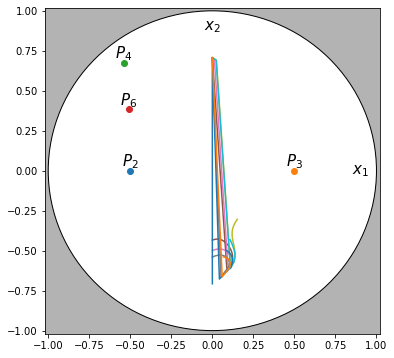

In [47]:
def x_prima_fig5(x,y,z,w):
    return x**2 - x*z - 3*y - z + w - 1.0


def y_prima_fig5(x,y,z,w):
    r = z/y
    m = -(1+r)/r
    return x*y + x*z/m - 2*y*(z-2.0)
   

def z_prima_fig5(x,y,z,w):
    r = z/y
    m = -(1+r)/r
    return -x*z/m - 2*z*(z-2.0)
    

def w_prima_fig5(x,y,z,w):
   return x*w - 2*z*w

plt.figure(figsize=(6,6))

fondo = plt.Rectangle((-1.02,-1.02), 2.04, 2.04, fc="#b3b3b3")
plt.gca().add_patch(fondo)

circulo = plt.Circle((0, 0), radius=1, fc="#ffffff", edgecolor="black")
plt.gca().add_patch(circulo)


p1 = [0,-1,2]
p1_p = [p1[0]/(1.0 + np.sqrt(p1[0]**2 + p1[1]**2 + p1[2]**2)),p1[1]/(1.0 + np.sqrt(p1[0]**2 + p1[1]**2 + p1[2]**2))]
p2 = [-1,0,0]
p2_p = [p2[0]/(1.0 + np.sqrt(p2[0]**2 + p2[1]**2 + p2[2]**2)),p2[1]/(1.0 + np.sqrt(p2[0]**2 + p2[1]**2 + p2[2]**2))]
p3 = [1,0,0]
p3_p = [p3[0]/(1.0 + np.sqrt(p3[0]**2 + p3[1]**2 + p3[2]**2)),p3[1]/(1.0 + np.sqrt(p3[0]**2 + p3[1]**2 + p3[2]**2))]
p4 = [-4,5,0]
p4_p = [p4[0]/(1.0 + np.sqrt(p4[0]**2 + p4[1]**2 + p4[2]**2)),p4[1]/(1.0 + np.sqrt(p4[0]**2 + p4[1]**2 + p4[2]**2))]
n = 1.0
p5 = [-3*(n+1)/n,(4*n+3)/(2*n**2),(4*n+3)/(2*n)]
p5_p = [p5[0]/(1.0 + np.sqrt(p5[0]**2 + p5[1]**2 + p5[2]**2)),p5[1]/(1.0 + np.sqrt(p5[0]**2 + p5[1]**2 + p5[2]**2))]
p6 = [-2*(n+2)/(2*n+1),(4*n+5)/((n+1)*(2*n+1)),n*(4*n+5)/((n+1)*(2*n+1))]
p6_p = [p6[0]/(1.0 + np.sqrt(p6[0]**2 + p6[1]**2 + p6[2]**2)),p6[1]/(1.0 + np.sqrt(p6[0]**2 + p6[1]**2 + p6[2]**2))]

plt.plot(p2_p[0],p2_p[1],marker="o")
plt.plot(p3_p[0],p3_p[1],marker="o")
plt.plot(p4_p[0],p4_p[1],marker="o")
plt.plot(p6_p[0],p6_p[1],marker="o")
plt.text(p2_p[0],p2_p[1],r'$P_2$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p3_p[0],p3_p[1],r'$P_3$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p4_p[0],p4_p[1],r'$P_4$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p6_p[0],p6_p[1],r'$P_6$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')

plt.text(0.9,0,r'$x_1$',fontsize=15, horizontalalignment='center',verticalalignment='center')
plt.text(0,0.9,r'$x_2$',fontsize=15, horizontalalignment='center',verticalalignment='center')


# Condiciones iniciales que debe poner
iniciales = np.array([[0,-1,2],[0,-2,3],[0,-3,4],[0,-4,5],[0.5,-1,2],[0.5,-2,3],[0.5,-3,4],[0.5,-4,5]])


for i in range(len(iniciales)):
    
    x_0,y_0,z_0 = iniciales[i,0], iniciales[i,1], iniciales[i,2]
    w_0 = 0.0

    N,x,y,z,w = solucion_sin_radiacion(-10,np.log(1.0 + 3E5),1000,x_0,y_0,z_0,w_0,x_prima_fig5,y_prima_fig5,z_prima_fig5,w_prima_fig5)

    # Se invierte el orden del array con el fin de tener la solucion "backwards" de la ecuacion diferencial
    x = x[::-1] 
    y = y[::-1]
    z = z[::-1]
    w = w[::-1]


    x_1p = x/(1 + np.sqrt(x**2 + y**2 + z**2))
    x_2p = y/(1 + np.sqrt(x**2 + y**2 + z**2))

    plt.plot(x_1p,x_2p)


plt.xlim(xmin=-1.02,xmax=1.02)
plt.ylim(ymin=-1.02,ymax=1.02)
plt.show()

## Figura 6 :

Se resuelve el sistema de ecuaciones diferenciales de la (26) a la (29) a través del método de Runge-Kutta de orden 4 y se hace uso de las ecuaciones (32) y (33). Todo para el modelo

\begin{align*}
    f(R) = R + \frac{\alpha}{R^2}
\end{align*}


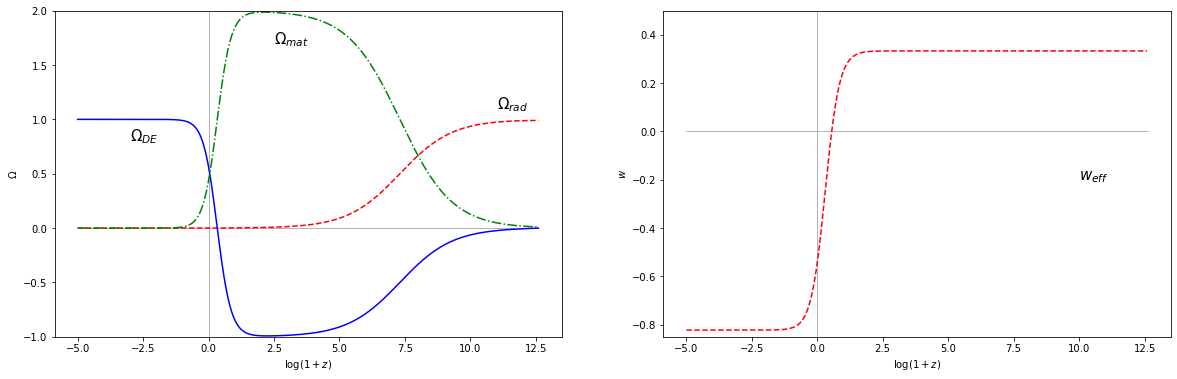

In [17]:
def x_prima_fig6(x,y,z,w):
    return x**2 - x*z - 3*y - z + w - 1.0


def y_prima_fig6(x,y,z,w):
    r = z/y
    m = -2.0*(1+r)/r
    return x*y + x*z/m - 2*y*(z-2.0)
   

def z_prima_fig6(x,y,z,w):
    r = z/y
    m = -2.0*(1+r)/r
    return -x*z/m - 2*z*(z-2.0)
    

def w_prima_fig6(x,y,z,w):
   return x*w - 2*z*w

x_0 = 0.0
y_0 = 2.13E-20
z_0 = 5.33E-21
w_0 = 0.99

N,x,y,z,w = solucion(-5.0,np.log(1.0 + 3E5),1000,x_0,y_0,z_0,w_0,x_prima_fig6,y_prima_fig6,z_prima_fig6,w_prima_fig6)

# Se invierte el orden del array con el fin de tener la solucion "backwards" de la ecuacion diferencial
x = x[::-1] 
y = y[::-1]
z = z[::-1]
w = w[::-1]

# Grafica
figura = plt.figure(figsize=(20,6))

figura1= figura.add_subplot(121)
linea_vertical_negra = plt.Polygon([[0, -1], [0, 2]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-5, 0], [np.log(1 + 3E5), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)
figura1.text(-3,0.8,r'$\Omega_{DE}$',fontsize=15)
figura1.text(2.5,1.7,r'$\Omega_{mat}$',fontsize=15)
figura1.text(11,1.1,r'$\Omega_{rad}$',fontsize=15)
figura1.plot(N,w,color="red",linestyle="dashed")
figura1.plot(N,x+y+z,color="blue",linestyle="-")
figura1.plot(N,1-x-y-z-w,color="green",linestyle="-.")
plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$\Omega$")
plt.ylim(ymin = -1, ymax = 2)

figura2= figura.add_subplot(122)
linea_vertical_negra = plt.Polygon([[0, -1], [0, 0.5]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-5, 0], [np.log(1 + 3E5), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)

r = z/y
F = 1.0 - 2*(r+1.0)/(2.0-r)
F_0 = 3.0/2.0
y = F/F_0

w_eff = -(1.0/3.0)*(2*z-1.0)
#w_DE = (1.0/3.0)*(1 - w*y - 2*z)/(1.0 - y*(1.0 - x - y - z))

plt.plot(N,w_eff,color="red",linestyle="--")
#plt.plot(N,w_DE,color="green")

plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$w$")
figura2.text(10,-0.2,r'$w_{eff}$',fontsize=15)
plt.ylim(ymin = -0.85, ymax = 0.5)
plt.show()

## Figura 7

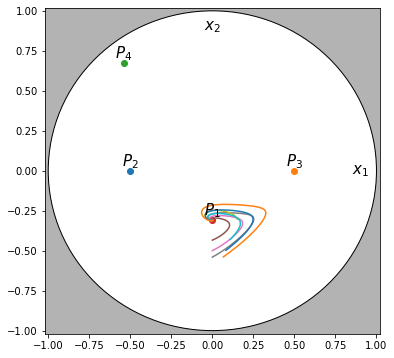

In [48]:
def x_prima_fig7(x,y,z,w):
    return x**2 - x*z - 3*y - z + w - 1.0


def y_prima_fig7(x,y,z,w):
    r = z/y
    m = 0.9*(1+r)/r
    return x*y + x*z/m - 2*y*(z-2.0)
   

def z_prima_fig7(x,y,z,w):
    r = z/y
    m = 0.9*(1+r)/r
    return -x*z/m - 2*z*(z-2.0)
    

def w_prima_fig7(x,y,z,w):
   return x*w - 2*z*w

plt.figure(figsize=(6,6))

fondo = plt.Rectangle((-1.02,-1.02), 2.04, 2.04, fc="#b3b3b3")
plt.gca().add_patch(fondo)

circulo = plt.Circle((0, 0), radius=1, fc="#ffffff", edgecolor="black")
plt.gca().add_patch(circulo)


p1 = [0,-1,2]
p1_p = [p1[0]/(1.0 + np.sqrt(p1[0]**2 + p1[1]**2 + p1[2]**2)),p1[1]/(1.0 + np.sqrt(p1[0]**2 + p1[1]**2 + p1[2]**2))]
p2 = [-1,0,0]
p2_p = [p2[0]/(1.0 + np.sqrt(p2[0]**2 + p2[1]**2 + p2[2]**2)),p2[1]/(1.0 + np.sqrt(p2[0]**2 + p2[1]**2 + p2[2]**2))]
p3 = [1,0,0]
p3_p = [p3[0]/(1.0 + np.sqrt(p3[0]**2 + p3[1]**2 + p3[2]**2)),p3[1]/(1.0 + np.sqrt(p3[0]**2 + p3[1]**2 + p3[2]**2))]
p4 = [-4,5,0]
p4_p = [p4[0]/(1.0 + np.sqrt(p4[0]**2 + p4[1]**2 + p4[2]**2)),p4[1]/(1.0 + np.sqrt(p4[0]**2 + p4[1]**2 + p4[2]**2))]
n = -0.9
p5 = [-3*(n+1)/n,(4*n+3)/(2*n**2),(4*n+3)/(2*n)]
p5_p = [p5[0]/(1.0 + np.sqrt(p5[0]**2 + p5[1]**2 + p5[2]**2)),p5[1]/(1.0 + np.sqrt(p5[0]**2 + p5[1]**2 + p5[2]**2))]
p6 = [-2*(n+2)/(2*n+1),(4*n+5)/((n+1)*(2*n+1)),n*(4*n+5)/((n+1)*(2*n+1))]
p6_p = [p6[0]/(1.0 + np.sqrt(p6[0]**2 + p6[1]**2 + p6[2]**2)),p6[1]/(1.0 + np.sqrt(p6[0]**2 + p6[1]**2 + p6[2]**2))]

plt.plot(p2_p[0],p2_p[1],marker="o")
plt.plot(p3_p[0],p3_p[1],marker="o")
plt.plot(p4_p[0],p4_p[1],marker="o")
plt.plot(p1_p[0],p1_p[1],marker="o")
plt.text(p2_p[0],p2_p[1],r'$P_2$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p3_p[0],p3_p[1],r'$P_3$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p4_p[0],p4_p[1],r'$P_4$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')
plt.text(p1_p[0],p1_p[1],r'$P_1$',fontsize=15, horizontalalignment='center',verticalalignment='bottom')

plt.text(0.9,0,r'$x_1$',fontsize=15, horizontalalignment='center',verticalalignment='center')
plt.text(0,0.9,r'$x_2$',fontsize=15, horizontalalignment='center',verticalalignment='center')


# Condiciones iniciales que debe poner
iniciales = np.array([[0,-1,2],[0,-2,3],[0,-3,4],[0,-4,5],[0.5,-1,2],[0.5,-2,3],[0.5,-3,4],[0.5,-4,5]])


for i in range(len(iniciales)):
    
    x_0,y_0,z_0 = iniciales[i,0], iniciales[i,1], iniciales[i,2]
    w_0 = 0.0

    N,x,y,z,w = solucion_sin_radiacion(-10,np.log(1.0 + 3E5),1000,x_0,y_0,z_0,w_0,x_prima_fig7,y_prima_fig7,z_prima_fig7,w_prima_fig7)

    # Se invierte el orden del array con el fin de tener la solucion "backwards" de la ecuacion diferencial
    x = x[::-1] 
    y = y[::-1]
    z = z[::-1]
    w = w[::-1]


    x_1p = x/(1 + np.sqrt(x**2 + y**2 + z**2))
    x_2p = y/(1 + np.sqrt(x**2 + y**2 + z**2))

    plt.plot(x_1p,x_2p)


plt.xlim(xmin=-1.02,xmax=1.02)
plt.ylim(ymin=-1.02,ymax=1.02)
plt.show()

## Figura 8 :

Se resuelve el sistema de ecuaciones diferenciales de la (26) a la (29) a través del método de Runge-Kutta de orden 4 y se hace uso de las ecuaciones (32) y (33). Todo para el modelo

\begin{align*}
    f(R) = R \log(\alpha R)
\end{align*}


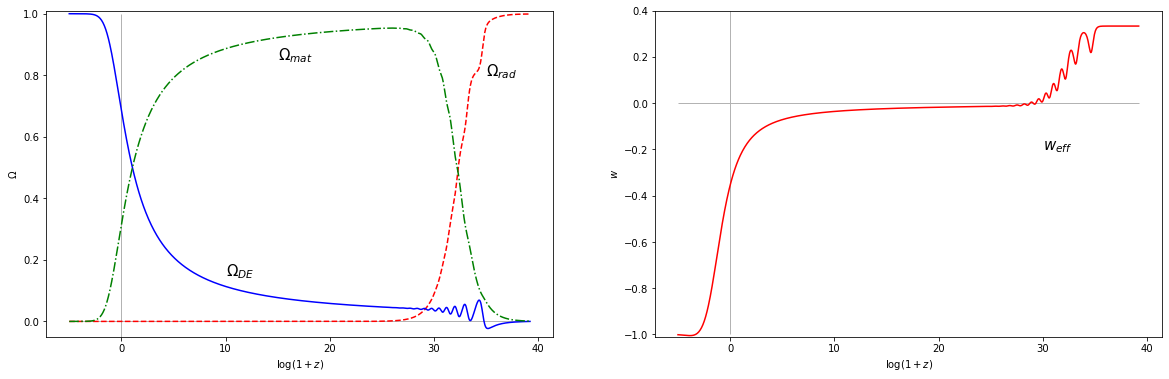

In [12]:
def x_prima_fig8(x,y,z,w):
    return x**2 - x*z - 3*y - z + w - 1.0


def y_prima_fig8(x,y,z,w):
    r = z/y
    m = (1+r)/r
    return x*y + x*z/m - 2*y*(z-2.0)
   

def z_prima_fig8(x,y,z,w):
    r = z/y
    m = (1+r)/r
    return -x*z/m - 2*z*(z-2.0)
    

def w_prima_fig8(x,y,z,w):
   return x*w - 2*z*w

x_0 = 1E-5
y_0 = -1E-10
z_0 = 1.01E-10
w_0 = 0.999

N,x,y,z,w = solucion(-5,np.log(1.0 + 1.1E17),1000,x_0,y_0,z_0,w_0,x_prima_fig8,y_prima_fig8,z_prima_fig8,w_prima_fig8)

# Se invierte el orden del array con el fin de tener la solucion "backwards" de la ecuacion diferencial
x = x[::-1] 
y = y[::-1]
z = z[::-1]
w = w[::-1]

# Grafica
figura = plt.figure(figsize=(20,6))

figura1= figura.add_subplot(121)
linea_vertical_negra = plt.Polygon([[0, -1.01], [0, 1]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-5, 0], [np.log(1 + 1.1E17), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)
figura1.text(10,0.15,r'$\Omega_{DE}$',fontsize=15)
figura1.text(15,0.85,r'$\Omega_{mat}$',fontsize=15)
figura1.text(35,0.8,r'$\Omega_{rad}$',fontsize=15)
figura1.plot(N,w,color="red",linestyle="dashed")
figura1.plot(N,x+y+z,color="blue",linestyle="-")
figura1.plot(N,1-x-y-z-w,color="green",linestyle="-.")
plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$\Omega$")
plt.ylim(ymin = -0.05, ymax = 1.01)

figura2= figura.add_subplot(122)
linea_vertical_negra = plt.Polygon([[0, -1], [0, 0.4]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-5, 0], [np.log(1 + 1.1E17), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)

w_eff = -(1.0/3.0)*(2*z-1.0)

plt.plot(N,w_eff,color="red",linestyle="-")

plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$w$")
figura2.text(30,-0.2,r'$w_{eff}$',fontsize=15)

plt.ylim(ymin = -1.01, ymax = 0.4)
plt.show()

## Figura 9 :

Se resuelve el sistema de ecuaciones diferenciales de la (26) a la (29) a través del método de Runge-Kutta de orden 4 y se hace uso de las ecuaciones (32) y (33). Todo para el modelo

\begin{align*}
    f(R) = R \log(\alpha R)
\end{align*}



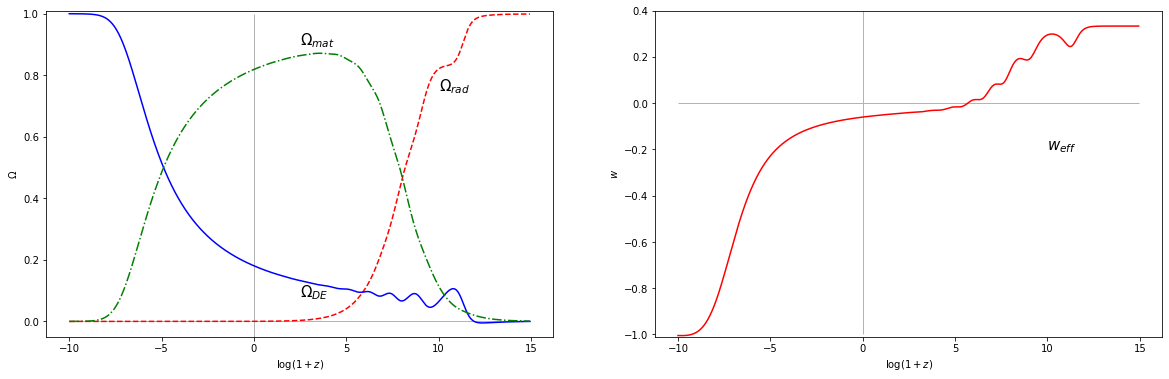

In [13]:
def x_prima_fig9(x,y,z,w):
    return x**2 - x*z - 3*y - z + w - 1.0


def y_prima_fig9(x,y,z,w):
    r = z/y
    m = (1+r)/r
    return x*y + x*z/m - 2*y*(z-2.0)
   

def z_prima_fig9(x,y,z,w):
    r = z/y
    m = (1+r)/r
    return -x*z/m - 2*z*(z-2.0)
    

def w_prima_fig9(x,y,z,w):
   return x*w - 2*z*w

x_0 = 1E-10
y_0 = -1E-7
z_0 = 1.019E-7
w_0 = 0.999

N,x,y,z,w = solucion(-10,np.log(1.0 + 3.15E6),1000,x_0,y_0,z_0,w_0,x_prima_fig9,y_prima_fig9,z_prima_fig9,w_prima_fig9)

# Se invierte el orden del array con el fin de tener la solucion "backwards" de la ecuacion diferencial
x = x[::-1] 
y = y[::-1]
z = z[::-1]
w = w[::-1]

# Grafica
figura = plt.figure(figsize=(20,6))

figura1= figura.add_subplot(121)
linea_vertical_negra = plt.Polygon([[0, -1.01], [0, 1]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-10, 0], [np.log(1 + 3.15E6), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)
figura1.text(2.5,0.08,r'$\Omega_{DE}$',fontsize=15)
figura1.text(2.5,0.9,r'$\Omega_{mat}$',fontsize=15)
figura1.text(10,0.75,r'$\Omega_{rad}$',fontsize=15)
figura1.plot(N,w,color="red",linestyle="dashed")
figura1.plot(N,x+y+z,color="blue",linestyle="-")
figura1.plot(N,1-x-y-z-w,color="green",linestyle="-.")
plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$\Omega$")
plt.ylim(ymin = -0.05, ymax = 1.01)

figura2= figura.add_subplot(122)
linea_vertical_negra = plt.Polygon([[0, -1], [0, 0.4]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-10, 0], [np.log(1 + 3.15E6), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)

w_eff = -(1.0/3.0)*(2*z-1.0)

plt.plot(N,w_eff,color="red",linestyle="-")

plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$w$")
figura2.text(10,-0.2,r'$w_{eff}$',fontsize=15)

plt.ylim(ymin = -1.01, ymax = 0.4)
plt.show()

## Figura 10 :

Se resuelve el sistema de ecuaciones diferenciales de la (26) a la (29) a través del método de Runge-Kutta de orden 4 y se hace uso de las ecuaciones (32) y (33). Todo para el modelo

\begin{align*}
    f(R) = R \exp(q/R)
\end{align*}

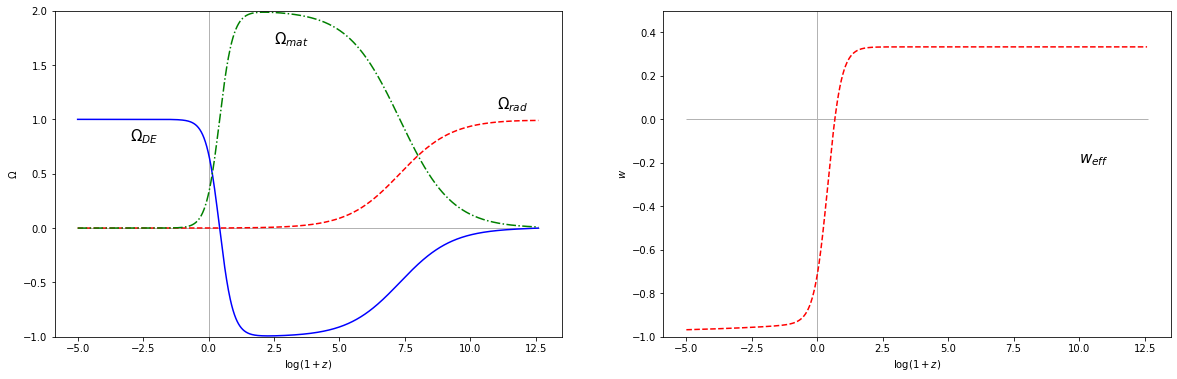

In [16]:
def x_prima_fig10(x,y,z,w):
    return x**2 - x*z - 3*y - z + w - 1.0


def y_prima_fig10(x,y,z,w):
    r = z/y
    m = -(1 + r*(2+r))/r
    return x*y + x*z/m - 2*y*(z-2.0)
   

def z_prima_fig10(x,y,z,w):
    r = z/y
    m = -(1 + r*(2+r))/r
    return -x*z/m - 2*z*(z-2.0)
    

def w_prima_fig10(x,y,z,w):
   return x*w - 2*z*w

x_0 = 0.0
y_0 = 2.13E-20
z_0 = 5.33E-21
w_0 = 0.99

N,x,y,z,w = solucion(-5.0,np.log(1.0 + 3E5),1000,x_0,y_0,z_0,w_0,x_prima_fig10,y_prima_fig10,z_prima_fig10,w_prima_fig10)

# Se invierte el orden del array con el fin de tener la solucion "backwards" de la ecuacion diferencial
x = x[::-1] 
y = y[::-1]
z = z[::-1]
w = w[::-1]

# Grafica
figura = plt.figure(figsize=(20,6))

figura1= figura.add_subplot(121)
linea_vertical_negra = plt.Polygon([[0, -1], [0, 2]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-5, 0], [np.log(1 + 3E5), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)
figura1.text(-3,0.8,r'$\Omega_{DE}$',fontsize=15)
figura1.text(2.5,1.7,r'$\Omega_{mat}$',fontsize=15)
figura1.text(11,1.1,r'$\Omega_{rad}$',fontsize=15)
figura1.plot(N,w,color="red",linestyle="dashed")
figura1.plot(N,x+y+z,color="blue",linestyle="-")
figura1.plot(N,1-x-y-z-w,color="green",linestyle="-.")
plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$\Omega$")
plt.ylim(ymin = -1, ymax = 2)

figura2= figura.add_subplot(122)
linea_vertical_negra = plt.Polygon([[0, -1], [0, 0.5]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-5, 0], [np.log(1 + 3E5), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)

r = z/y
F = 1.0 - 2*(r+1.0)/(2.0-r)
F_0 = 3.0/2.0
y = F/F_0

w_eff = -(1.0/3.0)*(2*z-1.0)
#w_DE = (1.0/3.0)*(1 - w*y - 2*z)/(1.0 - y*(1.0 - x - y - z))

plt.plot(N,w_eff,color="red",linestyle="--")
#plt.plot(N,w_DE,color="green")

plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$w$")
figura2.text(10,-0.2,r'$w_{eff}$',fontsize=15)
plt.ylim(ymin = -1, ymax = 0.5)
plt.show()

## Figura 11 :

Se resuelve el sistema de ecuaciones diferenciales de la (26) a la (29) a través del método de Runge-Kutta de orden 4 y se hace uso de las ecuaciones (32) y (33). Todo para el modelo

\begin{align*}
    m(r) = -0.2(1+r)(3.2 + 0.8r + r^2)
\end{align*}

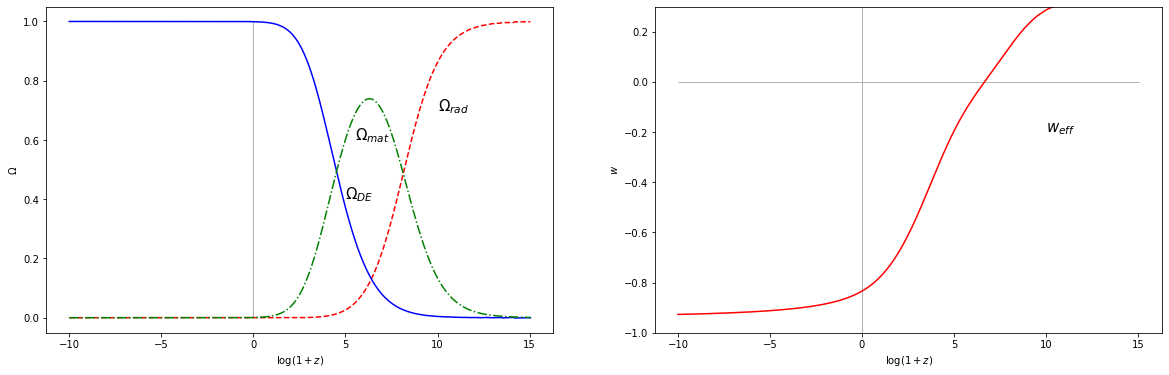

In [15]:
def x_prima_fig11(x,y,z,w):
    return x**2 - x*z - 3*y - z + w - 1.0


def y_prima_fig11(x,y,z,w):
    r = z/y
    m = -0.2*(1.0+r)*(3.2 + 0.8*r + r**2)
    return x*y + x*z/m - 2*y*(z-2.0)
   

def z_prima_fig11(x,y,z,w):
    r = z/y
    m = -0.2*(1.0+r)*(3.2 + 0.8*r + r**2)
    return -x*z/m - 2*z*(z-2.0)
    

def w_prima_fig11(x,y,z,w):
   return x*w - 2*z*w

x_0 = 1E-10
y_0 = -1E-7
z_0 = 1.0002E-7
w_0 = 0.999

N,x,y,z,w = solucion(-10.0,np.log(1.0 + 3.5E6),1000,x_0,y_0,z_0,w_0,x_prima_fig11,y_prima_fig11,z_prima_fig11,w_prima_fig11)

# Se invierte el orden del array con el fin de tener la solucion "backwards" de la ecuacion diferencial
x = x[::-1] 
y = y[::-1]
z = z[::-1]
w = w[::-1]

# Grafica
figura = plt.figure(figsize=(20,6))

figura1= figura.add_subplot(121)
linea_vertical_negra = plt.Polygon([[0, 0], [0, 1]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
figura1.text(5,0.4,r'$\Omega_{DE}$',fontsize=15)
figura1.text(5.5,0.6,r'$\Omega_{mat}$',fontsize=15)
figura1.text(10,0.7,r'$\Omega_{rad}$',fontsize=15)
figura1.plot(N,w,color="red",linestyle="dashed")
figura1.plot(N,x+y+z,color="blue",linestyle="-")
figura1.plot(N,1-x-y-z-w,color="green",linestyle="-.")
plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$\Omega$")
#plt.ylim(ymin = -0.05, ymax = 1.05)

figura2= figura.add_subplot(122)
linea_vertical_negra = plt.Polygon([[0, -1], [0, 0.3]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
linea_horizontal_negra = plt.Polygon([[-10, 0], [np.log(1 + 3.5E6), 0]], closed=None, fill=None, edgecolor='#b3b3b3',linestyle="-")
plt.gca().add_patch(linea_vertical_negra)
plt.gca().add_patch(linea_horizontal_negra)

w_eff = -(1.0/3.0)*(2*z-1.0)


plt.plot(N,w_eff,color="red",linestyle="-")
figura2.text(10,-0.2,r'$w_{eff}$',fontsize=15)
plt.xlabel(r"$\log(1 + z)$")
plt.ylabel(r"$w$")

plt.ylim(ymin = -1, ymax = 0.3)
plt.show()